In [16]:
from sklearn.datasets import fetch_openml
from sklearn import preprocessing
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
X, y = fetch_openml('mnist_784',return_X_y=True)
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


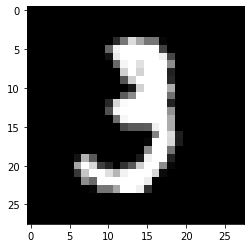

In [33]:
npp = X.iloc[10].to_numpy()
im = npp.reshape((28,28))
image = np.array(im.reshape((28, 28)))
plt.imshow(image, cmap='gray')
plt.show()

In [18]:
scaler = preprocessing.StandardScaler().fit(X)

In [19]:
X_scaled = scaler.transform(X)
print(np.shape(X))
print(np.shape(y))

(70000, 784)
(70000,)


In [20]:
pca = PCA(n_components = 0.95)
pca.fit(X_scaled)
reduced = pca.transform(X_scaled)


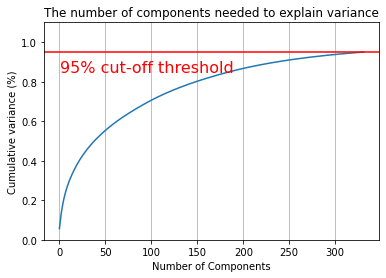

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
num_components = len(pca.explained_variance_ratio_)
index = np.arange(num_components)
yy = pca.explained_variance_ratio_.cumsum()

plt.ylim(0.0,1.1)
ax.plot(index, yy)

plt.xlabel('Number of Components')
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

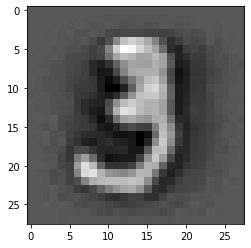

In [34]:
pca_im = pca.inverse_transform(reduced)
image2 = np.array(pca_im[10].reshape((28, 28)))
plt.imshow(image2, cmap='gray')
plt.show()